# ITEA Real Estate

## [Download worked project](../../_static/generated/itea-real-estate-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/itea-real-estate)

You will now analyze public real estates which are managed by ITEA agency in Trentino region, Italy. Every real estate has a type, and we will analyze the type distribution.

![expected-itea-plot preview](expected-itea-plot.png)

Data source: [ITEA - dati.trentino.it](https://dati.trentino.it/dataset/patrimonio-immobiliare), released under [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it) license.

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
itea-real-estate-prj
    itea-real-estate.ipynb
    itea-real-estate-sol.ipynb
    itea.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `itea-real-estate.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## load_itea

A function `load_itea` is given to load the dataset [itea.csv](itea.csv) (you don't need to implement it):

In [1]:
import csv

def load_itea():
    """Loads file data and RETURN a list of dictionaries with the stop times
    """        
    with open('itea.csv', newline='',  encoding='latin-1',) as csvfile:
        reader = csv.DictReader(csvfile,  delimiter=';')
        lst = []
        for d in reader:
            lst.append(d)
    return lst

itea = load_itea()

<div class="alert alert-warning">

**IMPORTANT**: look at the dataset by yourself !

Here we show only first 5 rows, but to get a clear picture of the dataset you need to study it a bit by yourself

</div>


In [2]:
itea[:5]

[OrderedDict([('Tipologia', 'ALTRO'),
              ('Proprietà', 'ITEA'),
              ('Indirizzo', "Codice unita': 30100049"),
              ('Frazione', ''),
              ('Comune', "BASELGA DI PINE'")]),
 OrderedDict([('Tipologia', 'ALLOGGIO'),
              ('Proprietà', 'ITEA'),
              ('Indirizzo', "Codice unita': 43100011"),
              ('Frazione', ''),
              ('Comune', 'TRENTO')]),
 OrderedDict([('Tipologia', 'ALLOGGIO'),
              ('Proprietà', 'ITEA'),
              ('Indirizzo', "Codice unita': 43100002"),
              ('Frazione', ''),
              ('Comune', 'TRENTO')]),
 OrderedDict([('Tipologia', 'ALLOGGIO'),
              ('Proprietà', 'ITEA'),
              ('Indirizzo', 'VIALE DELLE ROBINIE 26'),
              ('Frazione', ''),
              ('Comune', 'TRENTO')]),
 OrderedDict([('Tipologia', 'ALLOGGIO'),
              ('Proprietà', 'ITEA'),
              ('Indirizzo', 'VIALE DELLE ROBINIE 26'),
              ('Frazione', ''),
             

## calc_types_hist

Implement function `calc_types_hist` to extract the types (`'Tipologia'`) of ITEA real estate and RETURN a histogram which associates to each type its frequency.

- You will discover there are three types of apartments: `'ALLOGGIO'`, `'ALLOGGIO  DUPLEX'` and `'ALLOGGIO MONOLOCALE'`. In the resulting histogram you must place only the key `'ALLOGGIO'` which will be the sum of all of them.
- Same goes for `'POSTO MACCHINA'` (parking lot): there are many of them ( `'POSTO MACCHINA COMUNE ESTERNO'`,
 `'POSTO MACCHINA COMUNE INTERNO'`, `'POSTO MACCHINA ESTERNO'`, `'POSTO MACCHINA INTERNO'`, `'POSTO MACCHINA SOTTO TETTOIA'`) but we only want to see `'POSTO MACCHINA'` as key with the sum of all of them.

* **DO NOT** use 5 ifs, try to come up with some generic code to catch all these cases ..

Expected output:

```python
>>> calc_types_hist(itea)
{'ALTRO': 64,
 'ALLOGGIO': 10778,
 'POSTO MACCHINA': 3147,
 'MAGAZZINO': 143,
 'CABINA ELETTRICA': 41,
 'LOCALE COMUNE': 28,
 'NEGOZIO': 139,
 'CANTINA': 40,
 'GARAGE': 2221,
 'CENTRALE TERMICA': 4,
 'UFFICIO': 29,
 'TETTOIA': 2,
 'ARCHIVIO ITEA': 10,
 'SALA / ATTIVITA SOCIALI': 45,
 'AREA URBANA': 6,
 'ASILO': 1,
 'CASERMA': 2,
 'LABORATORIO PER ARTI E MESTIERI': 3,
 'MUSEO': 1,
 'SOFFITTA': 3,
 'AMBULATORIO': 1,
 'LEGNAIA': 3,
 'RUDERE': 1}
```

In [3]:


def calc_types_hist(db):
    
    
    tipologie = {}
    for diz in db:
        if diz['Tipologia'].startswith('ALLOGGIO'):
            chiave = 'ALLOGGIO'
        elif diz['Tipologia'].startswith('POSTO MACCHINA'):
            chiave = 'POSTO MACCHINA'
        else: 
            chiave = diz['Tipologia']
            
        if chiave in tipologie:            
            tipologie[chiave] += 1
        else:
            tipologie[chiave] = 1
        
    return tipologie
    
    
calc_types_hist(itea)

{'ALTRO': 64,
 'ALLOGGIO': 10778,
 'POSTO MACCHINA': 3147,
 'MAGAZZINO': 143,
 'CABINA ELETTRICA': 41,
 'LOCALE COMUNE': 28,
 'NEGOZIO': 139,
 'CANTINA': 40,
 'GARAGE': 2221,
 'CENTRALE TERMICA': 4,
 'UFFICIO': 29,
 'TETTOIA': 2,
 'ARCHIVIO ITEA': 10,
 'SALA / ATTIVITA SOCIALI': 45,
 'AREA URBANA': 6,
 'ASILO': 1,
 'CASERMA': 2,
 'LABORATORIO PER ARTI E MESTIERI': 3,
 'MUSEO': 1,
 'SOFFITTA': 3,
 'AMBULATORIO': 1,
 'LEGNAIA': 3,
 'RUDERE': 1}

In [3]:


def calc_types_hist(db):
    raise Exception('TODO IMPLEMENT ME !')
    
calc_types_hist(itea)


    
## calc_types_series

Implement a function to take a dictionary histogram and RETURN a list of tuples containing key/value pairs, sorted from most frequent to least frequent items.

**HINT**: if you don't remember how to sort by an element of a tuple, look at [this example](https://docs.python.org/3/howto/sorting.html#key-functions) in python documentation.

Expected output:

```python
>>> calc_types_series(calc_types_hist(itea))
[('ALLOGGIO', 10778),
 ('POSTO MACCHINA', 3147),
 ('GARAGE', 2221),
 ('MAGAZZINO', 143),
 ('NEGOZIO', 139),
 ('ALTRO', 64),
 ('SALA / ATTIVITA SOCIALI', 45),
 ('CABINA ELETTRICA', 41),
 ('CANTINA', 40),
 ('UFFICIO', 29)]
```

In [4]:

def calc_types_series(hist):
    
    ret = []
    
    for key in hist:
        ret.append((key, hist[key]))
    
    ret.sort(key=lambda c: c[1],reverse=True)
    return ret[:10]
    

types = calc_types_series(calc_types_hist(itea))

types

[('ALLOGGIO', 10778),
 ('POSTO MACCHINA', 3147),
 ('GARAGE', 2221),
 ('MAGAZZINO', 143),
 ('NEGOZIO', 139),
 ('ALTRO', 64),
 ('SALA / ATTIVITA SOCIALI', 45),
 ('CABINA ELETTRICA', 41),
 ('CANTINA', 40),
 ('UFFICIO', 29)]

In [4]:

def calc_types_series(hist):
    raise Exception('TODO IMPLEMENT ME !')

types = calc_types_series(calc_types_hist(itea))

types

## Real estates plot

Once you obtained the series as above, plot the first 10 most frequent items, in decreasing order.

- pay attention to plot title, width and height, axis labels. Everything MUST display in a readable way.

- try also to print nice the labels, if they are too long / overlap like for `'SALA / ATTIVITA SOCIALI'` put carriage returns in a generic way.

![expected-itea-plot.png](expected-itea-plot.png)

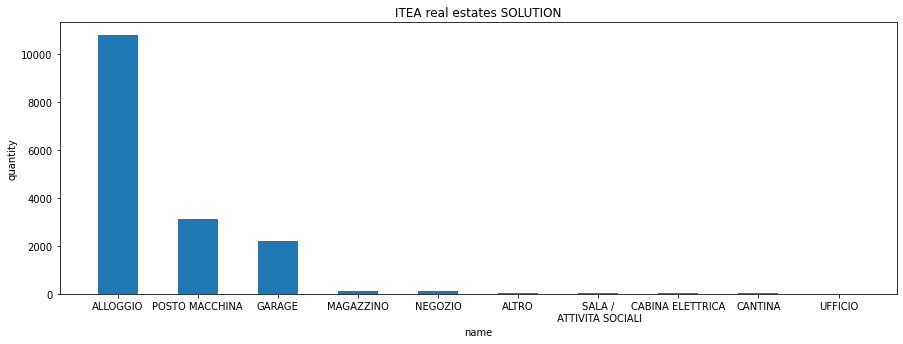

In [5]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# write here

xs = np.arange(len(types))

xs_labels = [t[0].replace('/', '/\n') for t in types]

ys = [t[1] for t in types]

fig = plt.figure(figsize=(15,5))

plt.bar(xs, ys, 0.5, align='center')

plt.title("ITEA real estates SOLUTION")
plt.xticks(xs, xs_labels)

plt.xlabel('name')
plt.ylabel('quantity')


plt.show()

In [5]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# write here

